# Algorithms for obtaining Simulated and Theoretical Probabilities

## Section 1: The Algorithms

Here we define the functions that help us obtain the simulated and theoretical probabilities of obtaining a real root when the coefficients are sampled from $\mathcal{U}(\alpha, \beta)$, where $\alpha$, $\beta \in \mathbb{R}$. The formula used for calculating theoretical probabilities is derived in the paper.

In [1]:
import math
import random

In [2]:
# The number of Monte Carlo simulations to perform
trials = 50_000

In [3]:
# The volume when f = 0
v0 = math.log(2) / 6 + 5.0 / 36.0

In [4]:
def get_simulated_probability_for(alpha, beta):
    """
    Returns the simulated probability of obtaining a real root of
    the equation Ax^2+Bx+c=0 when A, B, C are sampled from the distribution
    uniform(alpha, beta). It performs a set number of iterations
    (equal to "trials") and returns the ratio of the cases when
    the discriminant is non-negative to the total iteration count.
    """
    lo = min(alpha, beta)
    hi = max(alpha, beta)
    count = 0
    for _ in range(trials):
        a = random.uniform(lo, hi)
        b = random.uniform(lo, hi)
        c = random.uniform(lo, hi)
        
        if b * b >= 4 * a * c:
            count += 1

    return float(count) / trials

In [5]:
def signum(x):
    """
    Returns the signum value for x = abs(x) / x.
    """
    if x == 0:
        return 0
    return +1 if x > 0 else -1

In [6]:
def get_theoretical_probability_for(alpha, beta):
    """
    Returns the theoretical probability of obtaining a real root of
    the equation Ax^2+Bx+c=0 when A, B, C are sampled from the distribution
    uniform(alpha, beta). It scales the given distribution to uniform(f, 1),
    and then returns the probability based on the formula derived in the paper.
    """
    aa = float(abs(alpha))
    ab = float(abs(beta))
    theta = signum(alpha) * signum(beta) / max(aa, ab)
    f = min(aa, ab) * theta
    
    if f == 0:
        return v0
    if f > 0.5 or f < -1:
        return 0
    
    volume = (1 - f)**3
    r = abs(f)
    rr = r * r
    rrr = rr * r
    r32 = math.sqrt(rrr)
    lr6 = math.log(r) / 6
    
    if f > +0.25: # [0.25, 0.5]
        return (-v0 - lr6 + rr - 8.0 / 9 * rrr) / volume
    if f > +0:    # [0, 0.25]
        return (+v0 - 2 * r + 16.0 / 9 * r32 + rr - 8.0 / 9 * rrr) / volume
    if f > -0.5:  # [-0.5, 0]
        return (+v0 + 2 * r + 3 * rr + rrr * (2 * v0 - lr6 - 8.0 / 9)) / volume
    else:         # [-1, -0.5]
        return (2 * (v0 + r + rr) + lr6 + rrr * (2 * v0 - lr6)) / volume

## Section 2: Tabulation and Visualization of Data for Validation

In this section, we show that our theoretical formula lines up well with the simulated results.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# The number of points to plot in the graph
N = 101

In [9]:
x = [f for f in np.linspace(-1, +1, num=N, endpoint=True)]
y1 = [get_simulated_probability_for(f, 1) for f in x]
y2 = [get_theoretical_probability_for(f, 1) for f in x]

<module 'matplotlib.pyplot' from 'd:\\programs\\researchstuff\\uniform-general-case\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

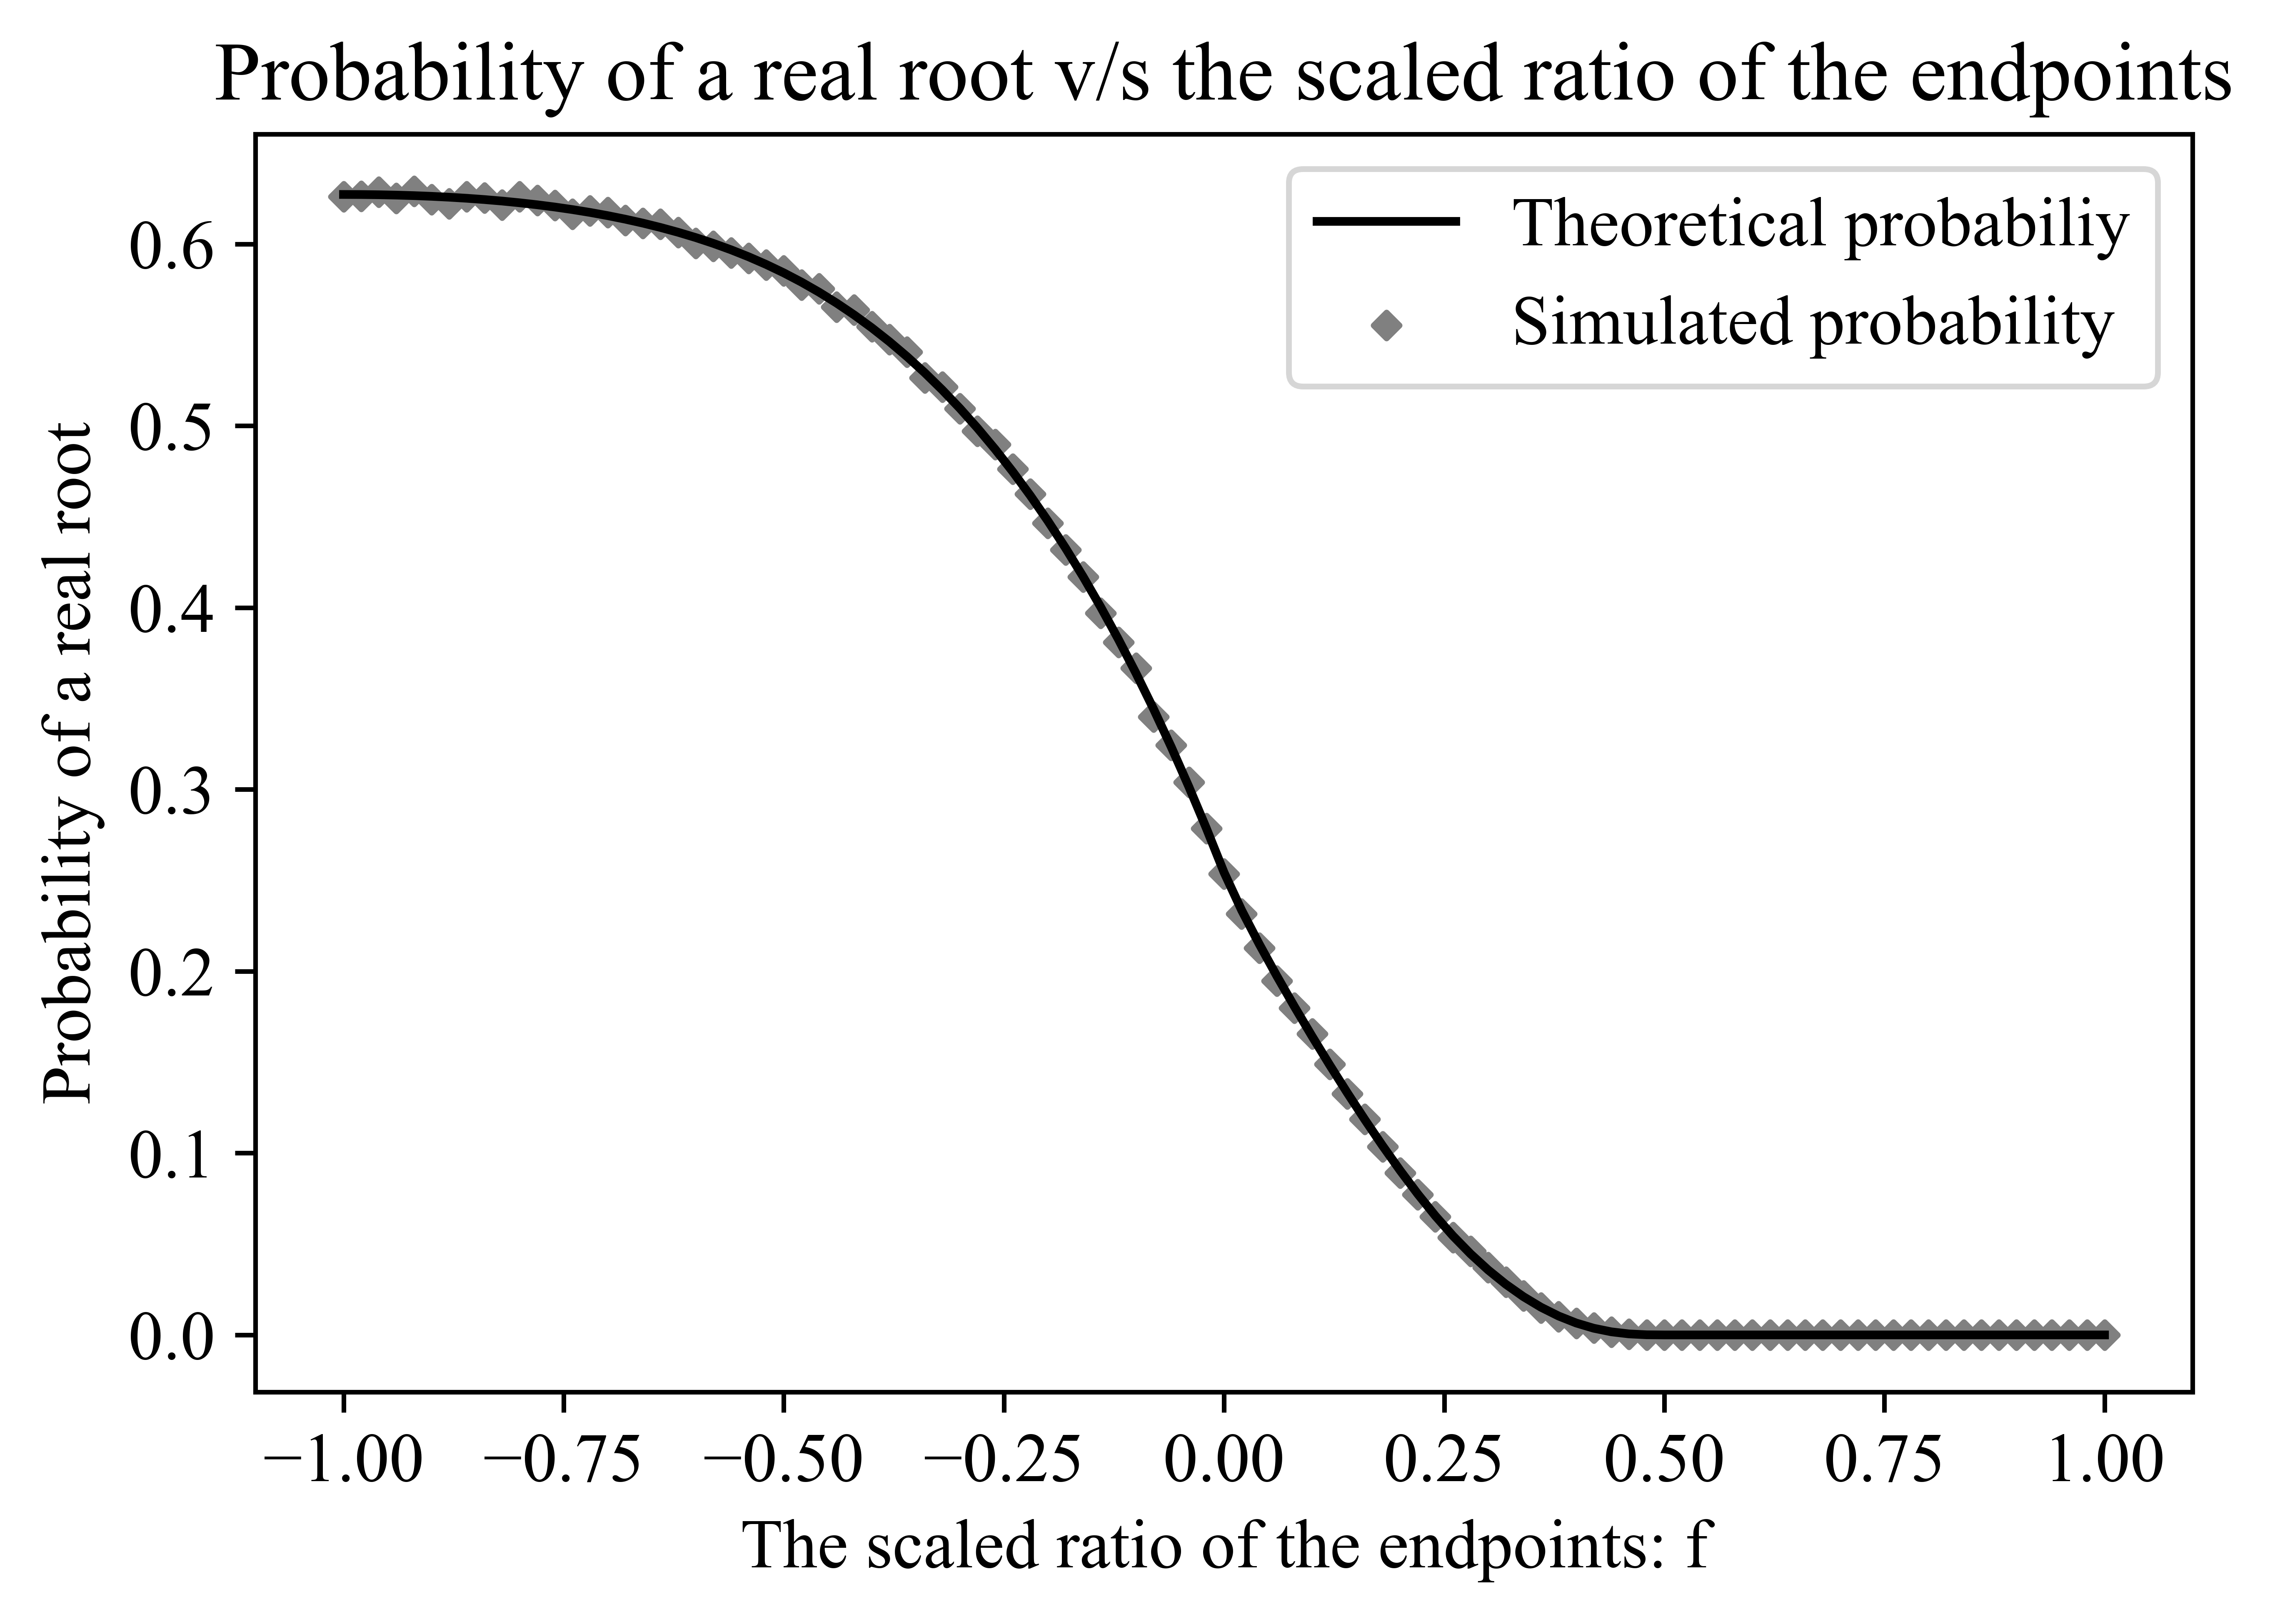

In [10]:
# Configuration for the plots
%matplotlib inline
plt.rcParams["figure.dpi"] = 1000
plt.rcParams["scatter.marker"] = "D"
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '12'

# Plot the data
plt.scatter(x, y1, color="grey", s=10.0, label="Simulated probability")
plt.plot(x, y2, color="black", label="Theoretical probabiliy")
plt.xlabel("The scaled ratio of the endpoints: f")
plt.ylabel("Probability of a real root")
plt.legend()
plt.title("Probability of a real root v/s the scaled ratio of the endpoints")
plt

In [11]:
pd.set_option("display.max_rows", N)
data = pd.DataFrame(data=zip(x, y1, y2), index=range(1, N + 1), columns=["f", "Simulated", "Theoretical"])
data

,f,Simulated,Theoretical
1,-1.00,0.62596,0.627207
2,-0.98,0.62618,0.627169
3,-0.96,0.62858,0.627053
4,-0.94,0.62512,0.626854
5,-0.92,0.62890,0.626567
6,-0.90,0.62442,0.626185
7,-0.88,0.62210,0.625703
8,-0.86,0.62612,0.625114
9,-0.84,0.62540,0.624412
10,-0.82,0.62156,0.623587


In [12]:
def get_data_row_for(alpha, beta):
    aa = abs(alpha)
    ab = abs(beta)
    f =  signum(alpha) * signum(beta) * min(aa, ab) / max(aa, ab)
    return [
        alpha,
        beta,
        f,
        get_simulated_probability_for(alpha, beta),
        get_theoretical_probability_for(alpha, beta)
    ]

In [13]:
ranges = [
    (0, 1.0),
    (-1, 1),
    (0, 10),
    (0.5, 1),
    (5, 10),
    (-20, 300),
    (200, 1000),
    (-300, -4000),
    (math.e, -math.pi),
    (35.3, 1e8)
]

rows = []
cols = ["alpha", "beta", "f", "Simulated", "Theoretical"]
for r in ranges:
    alpha, beta = r
    rows.append(get_data_row_for(alpha, beta))   

In [14]:
df = pd.DataFrame(data=rows, index=range(1, len(ranges) + 1), columns=cols)
df

,alpha,beta,f,Simulated,Theoretical
1,0.000000,1.000000e+00,0.000000e+00,0.25308,0.254413
2,-1.000000,1.000000e+00,-1.000000e+00,0.62426,0.627207
3,0.000000,1.000000e+01,0.000000e+00,0.25422,0.254413
4,0.500000,1.000000e+00,5.000000e-01,0.00000,0.000000
5,5.000000,1.000000e+01,5.000000e-01,0.00000,0.000000
6,-20.000000,3.000000e+02,-6.666667e-02,0.33308,0.330497
7,200.000000,1.000000e+03,2.000000e-01,0.09018,0.090452
8,-300.000000,-4.000000e+03,7.500000e-02,0.18580,0.184696
9,2.718282,-3.141593e+00,-8.652560e-01,0.62892,0.625280
10,35.300000,1.000000e+08,3.530000e-07,0.25164,0.254413
